In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

import matplotlib as mpl
import matplotlib.colors as colors

In [5]:
E_list = glob.glob('DATA/SF Rotation*')

In [6]:
E_list

['DATA/SF Rotation 80.npz',
 'DATA/SF Rotation 10 2.npz',
 'DATA/SF Rotation 10 3.npz',
 'DATA/SF Rotation 30.npz',
 'DATA/SF Rotation 10.npz',
 'DATA/SF Rotation 70.npz']

In [16]:
A = C

In [17]:
# for E in E_list: 
# A = np.load(E_list[1])
B = np.load(E_list[0])
# D = np.load(E_list[2])


In [18]:
Keys = [*A.keys()]

In [19]:
C = {}

In [20]:
for key in Keys:
    if key != 'Ds':
        print(B[key].shape)
        print(A[key].shape)
        C[key] = np.r_[B[key],A[key]]
    else:
        C[key] = A[key]

(80, 41)
(20, 41)
(80, 41)
(20, 41)
(80, 41)
(20, 41)
(80, 41, 1000)
(20, 41, 1000)


In [21]:
for key in Keys:
    print(C[key].shape)

(100, 41)
(100, 41)
(100, 41)
(100, 41, 1000)
(41,)


In [26]:
C['B_RM'].shape

(100, 41)

In [24]:
B['B_RM'].shape

(90, 41)

In [22]:
net = E_list[0].split('/')[1].split(' ')[0]
np.savez(f'DATA/{net} Rotation 100',B_RM = C['B_RM'],B_S=C['B_S'],B_C=C['B_C'],B_T=C['B_T'],Ds=C['Ds'])

## SF NETWORK

In [23]:
N_SF = pickle.load(open('DATA/SF GRAPH/SF.pickle','rb'))
mk = N_SF[0,'mk']
Aij= N_SF[0,'Aij']
G = N_SF[0,'G']

In [24]:
ND= N_SF[0,'D']
Arg_D = np.argsort(ND)

In [25]:
UND = np.unique(ND)
arg_ND = {}
for D_ in UND:
    arg_ND[D_], = np.where(ND==D_)

In [26]:
Data = np.load('DATA/SF Rotation 100.npz')

In [28]:
B_T = Data['B_T']
Ds = Data['Ds']

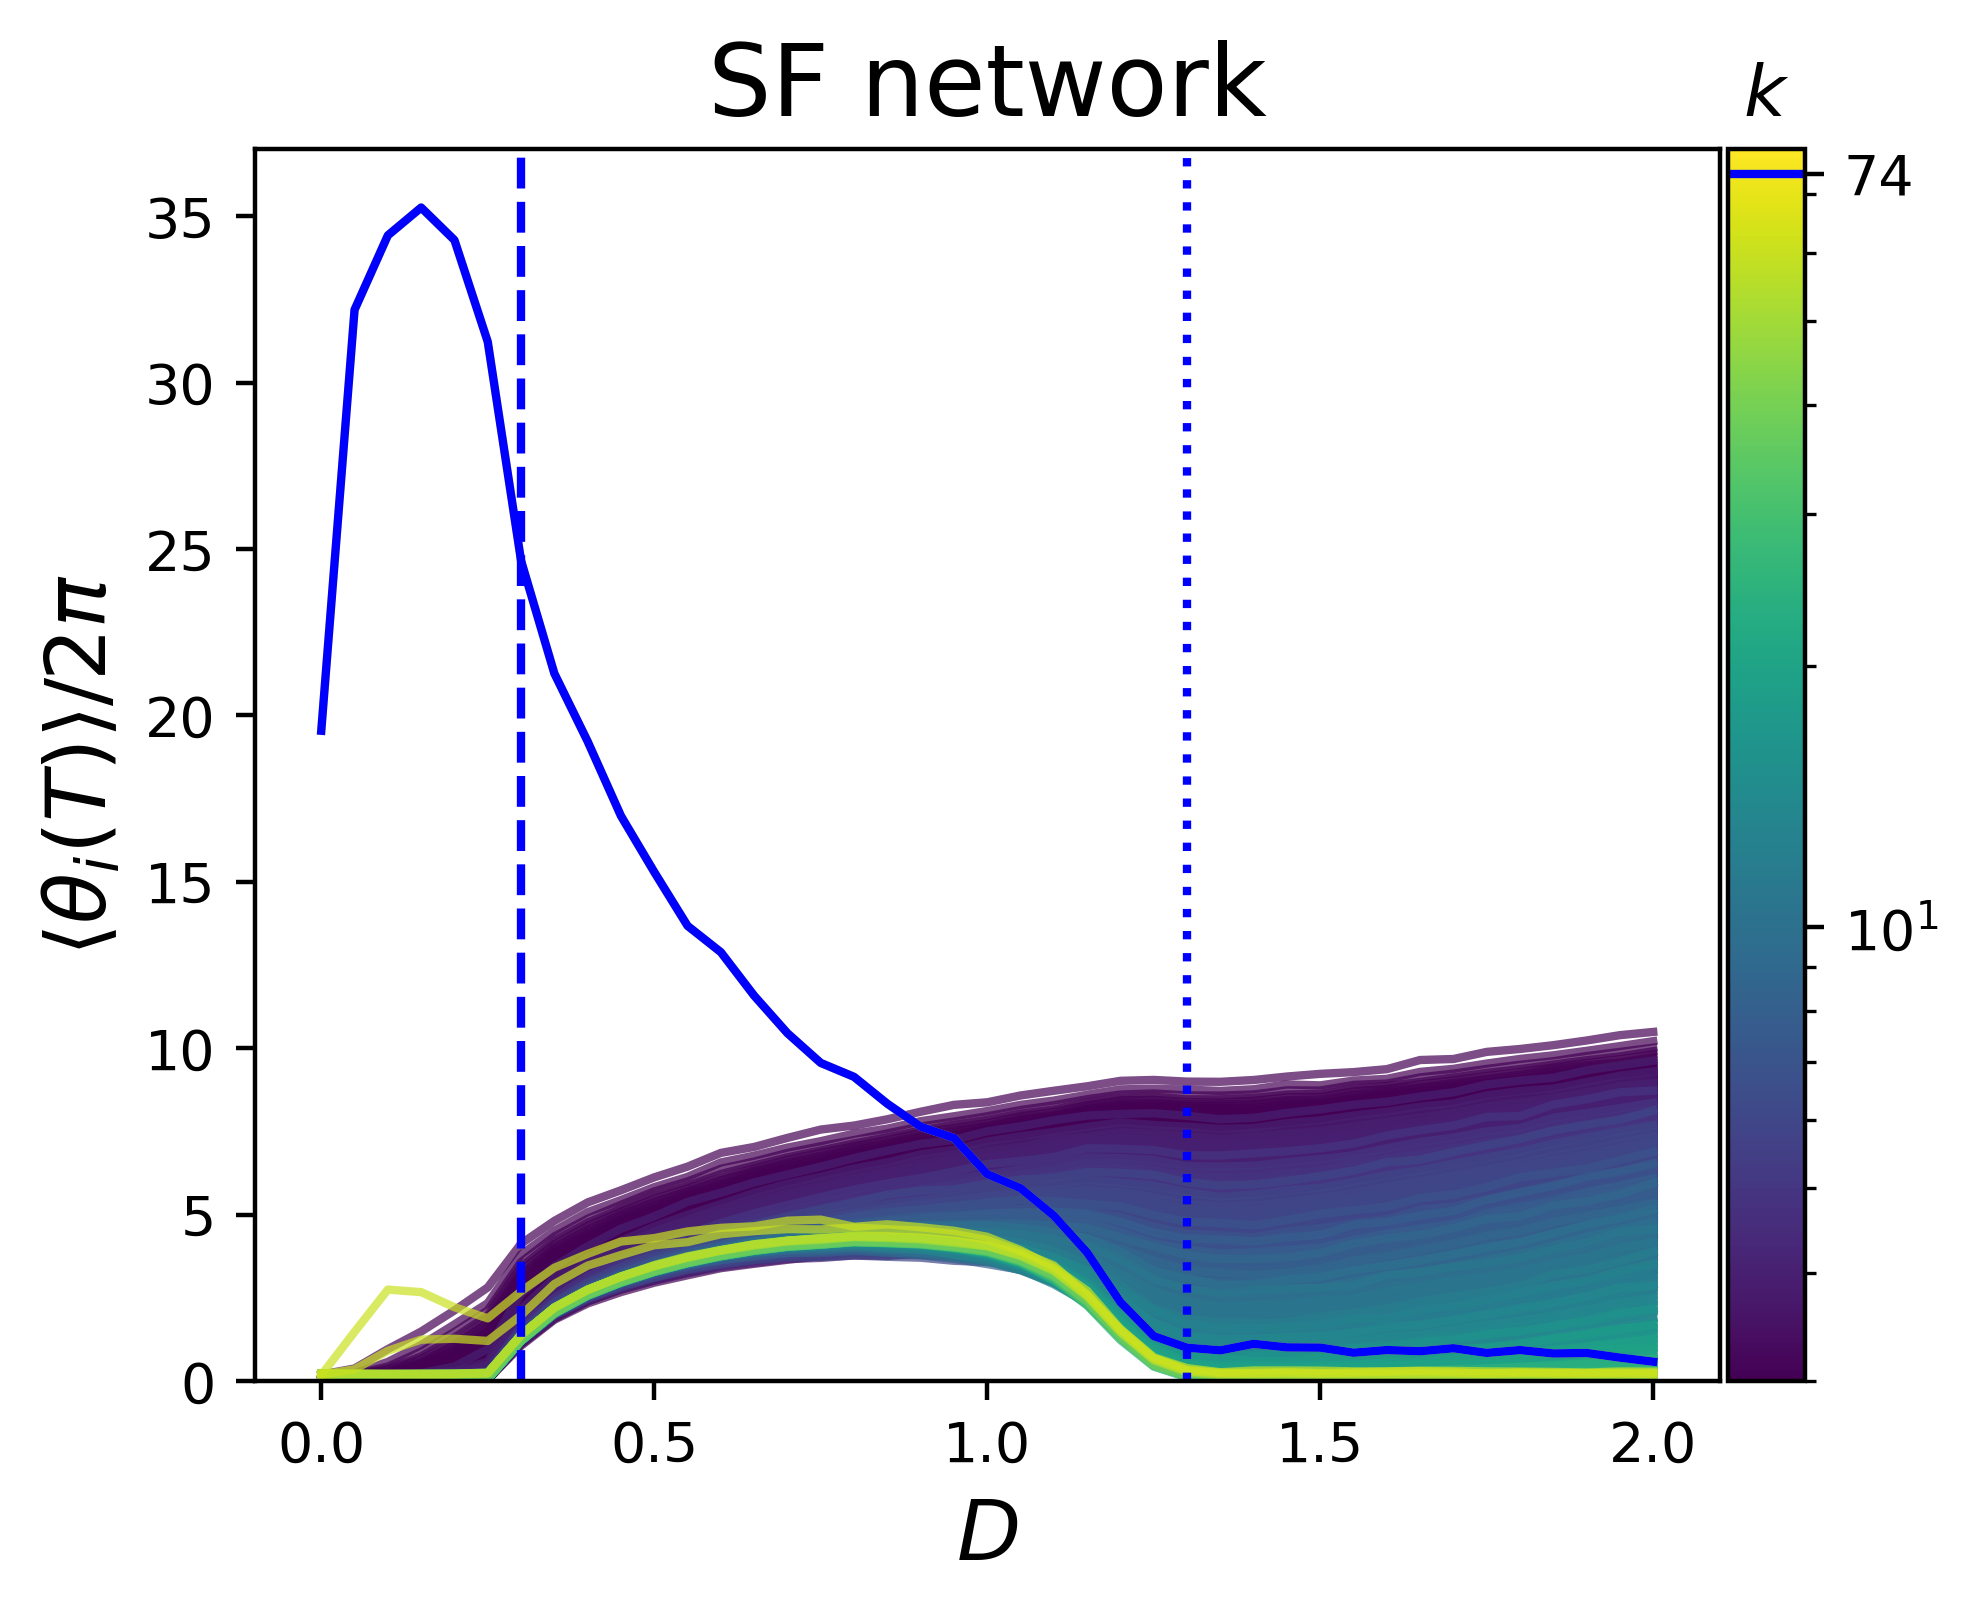

In [39]:
fig,(ax1,cbar_ax) = plt.subplots(1,2,gridspec_kw={'width_ratios': [19, 1]},dpi=400,figsize=(5,4))
plt.sca(ax1)
norm = colors.LogNorm(vmin=np.min(UND),vmax=np.max(UND)+5)
cm = plt.cm.viridis
for D_ in UND:
    B_TN = B_T[:,:,arg_ND[D_]]/(np.pi*2)
    B_TN = np.sort(B_TN,axis=2)/(np.pi*2)
    B_TNM = np.mean(B_TN,axis=0)
    B_TNS = np.std(B_TN,axis=0)
    plt.plot(Ds,B_TNM,color=cm(norm(D_)),alpha=0.7)

D_ = UND[-1]
B_TN = B_T[:,:,arg_ND[D_]]/(np.pi*2)
B_TN = np.sort(B_TN,axis=2)/(np.pi*2)
B_TNM = np.mean(B_TN,axis=0)
B_TNS = np.std(B_TN,axis=0)
plt.plot(Ds,B_TNM,color='blue',alpha=1)
    # plt.plot(Ds,np.sort(B_T[:,:,arg_ND[D_]]//(np.pi*2),axis=1),color=c,alpha=0.8)

# plt.colorbar()

plt.axvline(0.3,color='blue',ls='--')
plt.axvline(1.3,color='blue',ls=':')

plt.ylabel(r'$\langle\theta_i(T)\rangle/2\pi$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
plt.ylim(0,)

# plt.xlim(0,2)
plt.subplots_adjust(wspace=0.01)
plt.title('SF network',fontsize=18)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cm, norm=norm, orientation='vertical')
cb1.ax.set_title(r'$k$',fontsize=13)
cb1.ax.axhline(D_,color='blue')
cb1.ax.set_yticks([10,D_],[r'$10^1$',f'{D_}'])

# ER Network

In [100]:
N_ER = pickle.load(open('DATA/ER GRAPH/ER.pickle','rb'))
mk = N_ER[0,'mk']
Aij= N_ER[0,'Aij']
G = N_ER[0,'G']

ND= N_ER[0,'D']
Arg_D = np.argsort(ND)

UND = np.unique(ND)
arg_ND = {}
for D_ in UND:
    arg_ND[D_], = np.where(ND==D_)

In [102]:
Data = np.load('DATA/ER Rotation 100.npz')
B_T = Data['B_T']
Ds = Data['Ds']

Text(0.5, 1.0, '$k$')

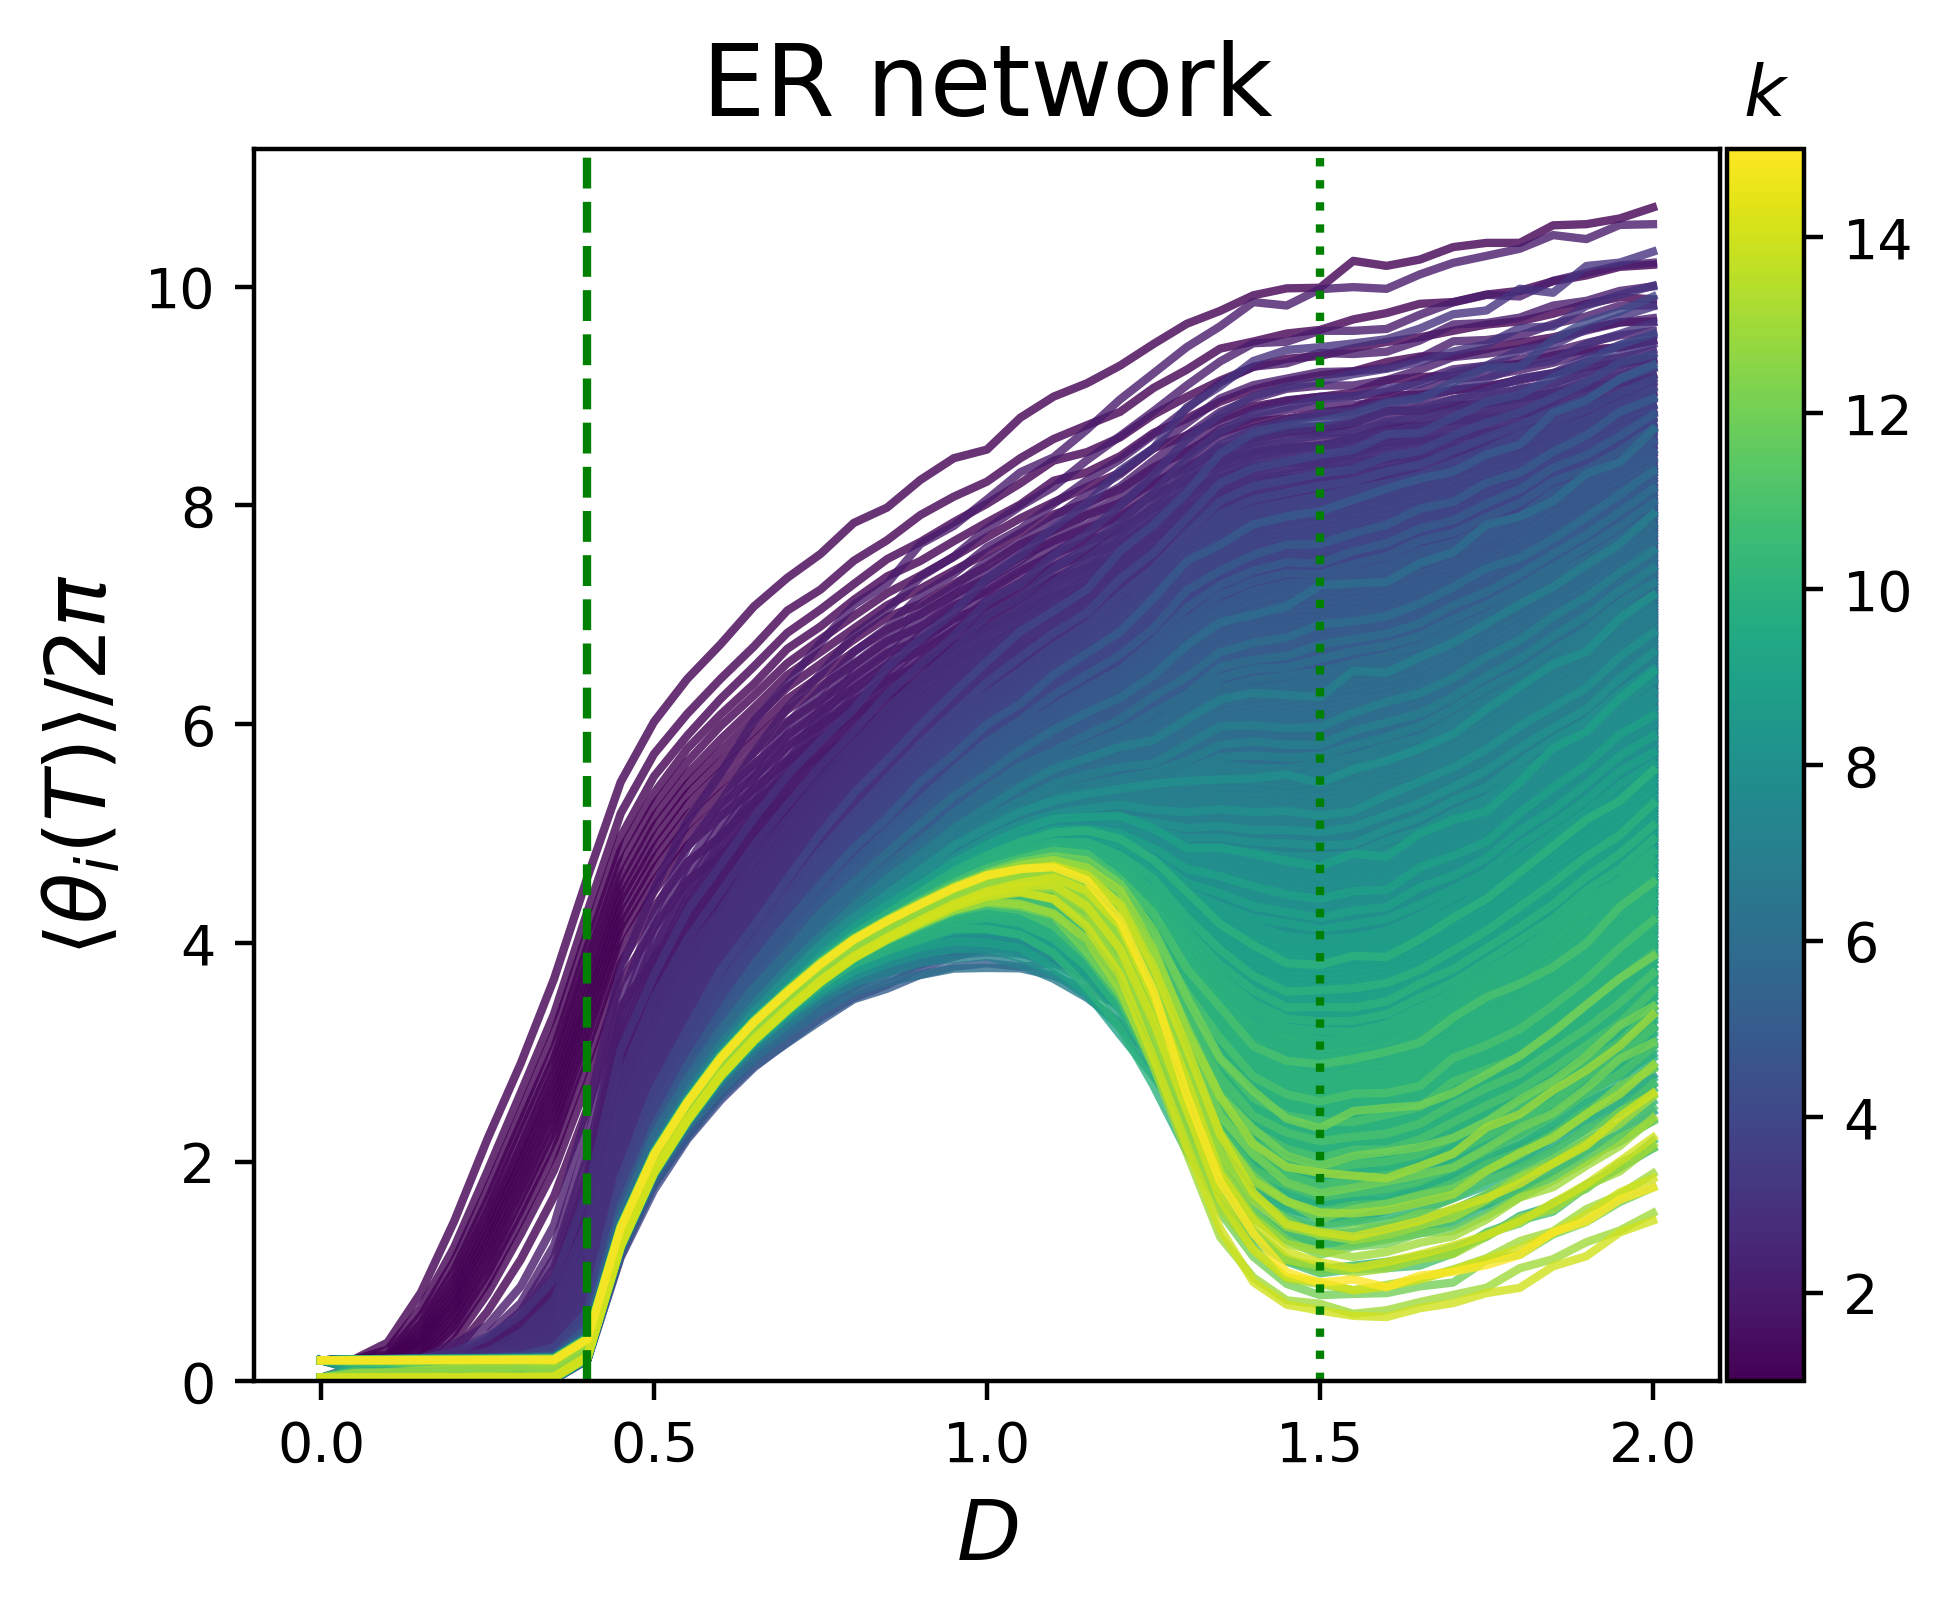

In [104]:
fig,(ax1,cbar_ax) = plt.subplots(1,2,gridspec_kw={'width_ratios': [19, 1]},dpi=400,figsize=(5,4))
plt.sca(ax1)
norm = plt.Normalize(vmin=np.min(UND),vmax=np.max(UND))
cm = plt.cm.viridis
for D_ in UND:
    B_TN = B_T[:,:,arg_ND[D_]]/(np.pi*2)
    B_TN = np.sort(B_TN,axis=2)/(np.pi*2)
    B_TNM = np.mean(B_TN,axis=0)
    B_TNS = np.std(B_TN,axis=0)
    plt.plot(Ds,B_TNM,color=cm(norm(D_)),alpha=0.8)
    # plt.plot(Ds,np.sort(B_T[:,:,arg_ND[D_]]//(np.pi*2),axis=1),color=c,alpha=0.8)

# plt.colorbar()

plt.axvline(0.4,color='green',ls='--')
plt.axvline(1.5,color='green',ls=':')

plt.ylabel(r'$\langle\theta_i(T)\rangle/2\pi$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
plt.ylim(0,)
# plt.xlim(0,2)
plt.subplots_adjust(wspace=0.01)
plt.title('ER network',fontsize=18)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cm, norm=norm, orientation='vertical')
cb1.ax.set_title(r'$k$',fontsize=13)